## CDSDA1040 –  Assignment #1: Rule Mining / Recommender AssociationSystems
### Group 05 - Project: Movie Recommendation System

In [76]:
# Reference websites
# https://github.com/khanhnamle1994/movielens/blob/master/Content_Based_and_Collaborative_Filtering_Models.ipynb
# https://github.com/khanhnamle1994/movielens/blob/master/SVD_Model.ipynb
# https://github.com/khanhnamle1994/movielens/blob/master/Deep_Learning_Model.ipynb

#### Movie Recommendation system

Why Recommendation systems?
- They help the user find items of their interest, quickly.
- Identify the most prevalent products for each user

Systems Involve:
- Content based filtering
- Collaborative filtering


### 1.0 Python Packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### 2.0 Initial Data Collection

In [78]:
# Load MovieLens data
# https://grouplens.org/datasets/movielens/, (MovieLens 1M Dataset)

In [79]:
# Reading ratings file
ratings = pd.read_csv('ml-1m/ratings.dat', sep="::", header=None, engine='python',usecols=[0,1,2])
ratings.columns = ['user_id', 'movie_id', 'rating']

# Reading users file
users = pd.read_csv("ml-1m/users.dat", sep="::", header=None, engine='python',usecols=[0,1,2,3,4])
users.columns = ['user_id', 'gender', 'age_desc', 'occ_desc','zipcode']

# Reading movies file
movies = pd.read_csv("ml-1m/movies.dat", sep="::", header=None, engine='python',usecols=[0,1,2])
movies.columns = ['movie_id', 'title', 'genres']

#### The MovieLens Dataset
GroupLens Research has collected and made available rating data sets from the MovieLens web site (https://movielens.org). The data sets were collected over various periods of time, depending on the size of the set.

The dataset used for building a recommender system has over 1 Million movie ratings from 6040 users on 3,900 movies. The release datte for this dataset is February 2003.

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. 

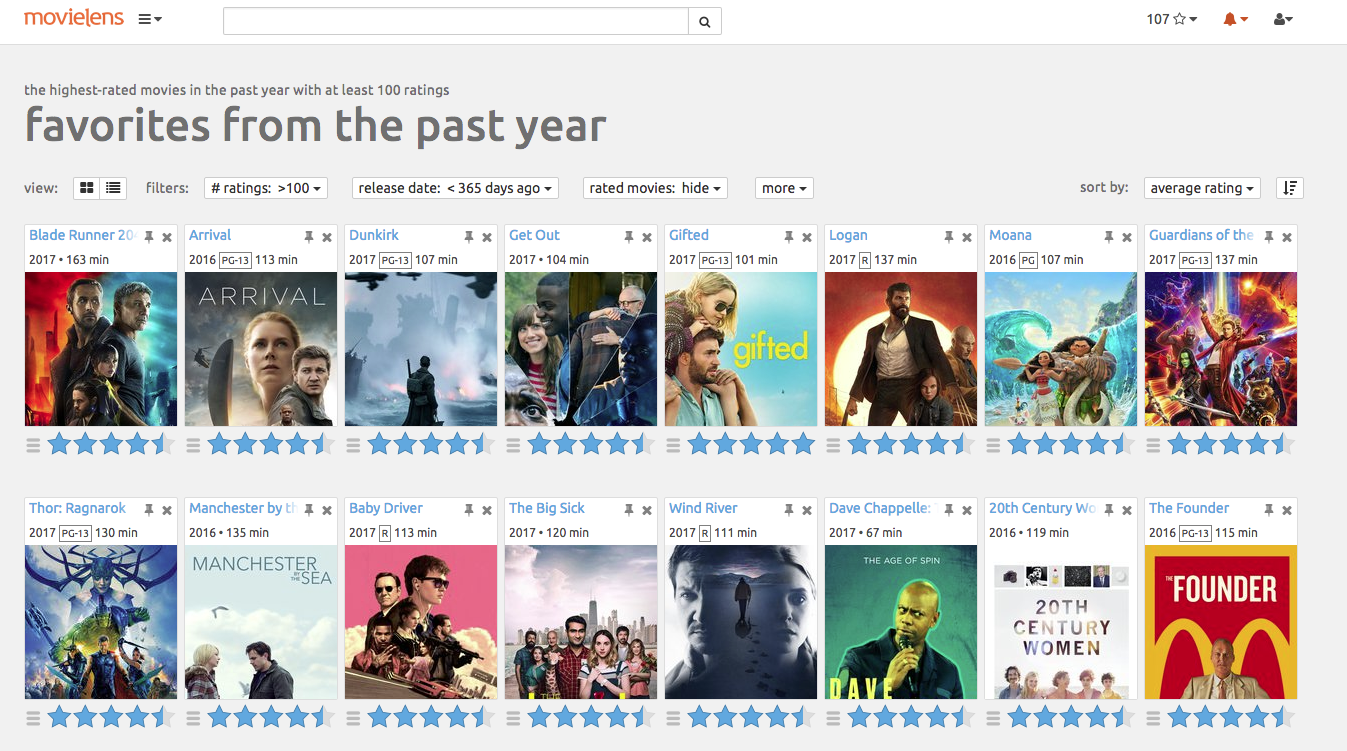

#### RATINGS FILE DESCRIPTION
All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp
- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Each user has at least 20 ratings

#### USERS FILE DESCRIPTION
User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code
- UserIDs range between 1 and 6040 
- Gender  "M" for Male, "F" for Female
- Age range from 1 to 56
- Occupation ranges over 20 different types

#### MOVIES FILE DESCRIPTION
Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres 
- MovieIDs range between 1 and 3952
- Titles total 3952
- Genres consisted of 18 categories (ex. Action/Adventure)

Two most popular types of personalized recommendation systems are Content-Based and Collaborative Filtering. Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the “wisdom of the crowd” to recommend items. In contrast, content-based recommendation systems focus on the attributes of the items and give you recommendations based on the similarity between them.

Both systems will be implemented to recommend movies and evaluate them to see which one performs better.

### 2.1 Describe Data

Examining MovieLens datasets

#### Ratings Dataset

In [80]:
# Check the top 5 rows
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [81]:
# List number of Rows and Columns
ratings.shape

(1000209, 3)

In [82]:
# Check the file info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [83]:
# Generate descriptive statistics (summarize the central tendency, dispersion and shape of a dataset’s distribution)
ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


#### Users Dataset

In [84]:
# Check the top 5 rows
users.head()

,user_id,gender,age_desc,occ_desc,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [85]:
# List number of Rows and Columns
users.shape

(6040, 5)

In [86]:
# Check the file info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   age_desc  6040 non-null   int64 
 3   occ_desc  6040 non-null   int64 
 4   zipcode   6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [87]:
# Generate descriptive statistics (summarize the central tendency, dispersion and shape of a dataset’s distribution)
users.describe()

,user_id,age_desc,occ_desc
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


#### Movies Dataset

In [88]:
# Check the top 5 rows
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
# List number of Rows and Columns
movies.shape

(3883, 3)

In [90]:
# Check the file info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### 2.2 Explore Data

### Ratings dataset
Examine the Ratings file further. 

,count
rating,
1,56174
2,107557
3,261197
4,348971
5,226310


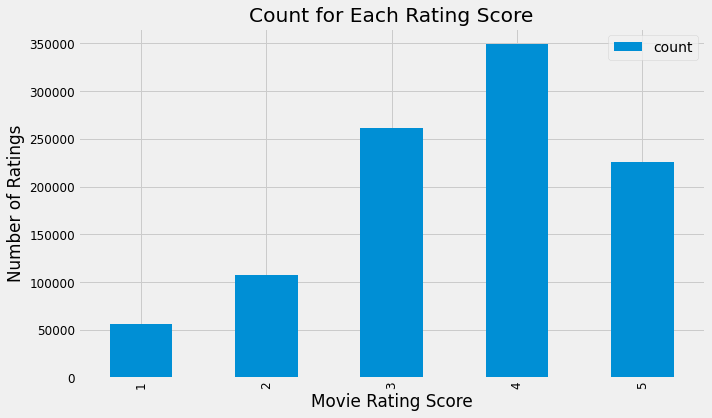

In [91]:
rating_count = pd.DataFrame(ratings.groupby(['rating']).size(), columns=['count'])
ax = rating_count.reset_index().rename(columns={'index': 'Rating Score'}).plot('rating','count', 'bar',
    figsize=(10, 6),
    title='Count for Each Rating Score',                                                  
    fontsize=12)

ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")
rating_count

### Movies dataset - Genres

In [92]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)

In [93]:
# Genres sorted by highest count for all Movies
keyword_occurences[:20]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Western', 68],
 ['Fantasy', 68],
 ['Film-Noir', 44]]

#### Drama, Comedy and Action movies are the most watched shows (upper display).

Display below shows the Genres plotted as a Tag Cloud. 
Highest count has Largest text (Drama (most watched)).
Lowest count, smallest text (Film-Noir (least watched)).

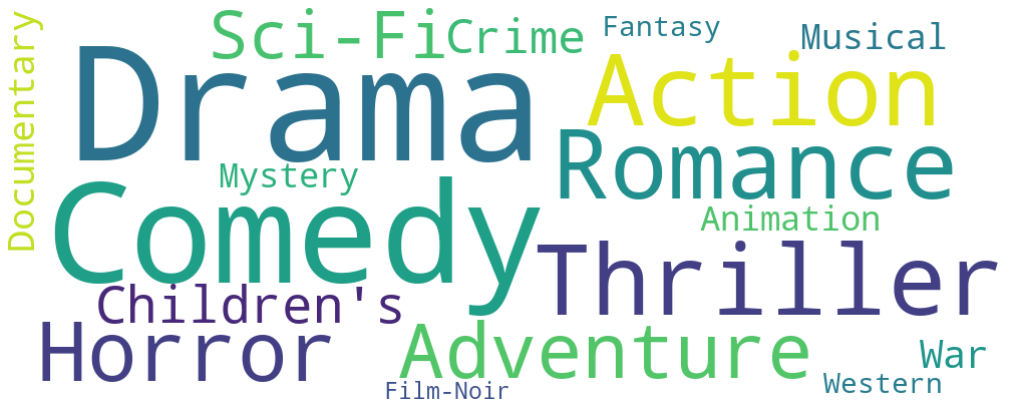

In [94]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 3.0 Data Preparation

In [95]:
# Data Preparation Overview
# Merging Data
# Duplicate/Missing values
# Cleaning Data
# Constructing New Data
# Integrating Data
# Formatting Data
# Ready for modeling?

### 3. 1 Merging datasets together

In [96]:
# Merge movies, ratings & users datasets

In [97]:
datamerge = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
datamerge[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [98]:
datamerge

,movie_id,title,genres,user_id,rating,gender,age_desc,occ_desc,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,48067
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4,92843


### 3. 2 Duplicate entries/Missing Values

In [99]:
#check for duplicate entries
datamerge.duplicated().sum()

0

In [100]:
# check missing values in dataframe
datamerge.isnull().sum()

movie_id    0
title       0
genres      0
user_id     0
rating      0
gender      0
age_desc    0
occ_desc    0
zipcode     0
dtype: int64

### 3.3 Outliers

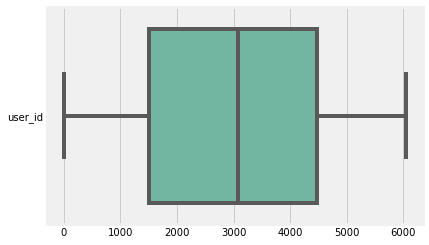

In [101]:
data_outlier1 = datamerge[['user_id']]
ax = sns.boxplot(data=data_outlier1, orient="h", palette="Set2")

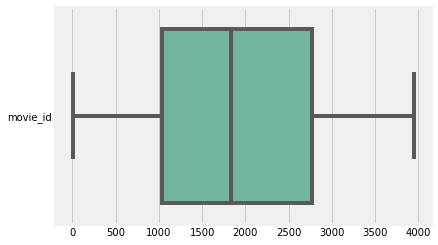

In [102]:
data_outlier2 = datamerge[['movie_id']]
ax = sns.boxplot(data=data_outlier2, orient="h", palette="Set2")

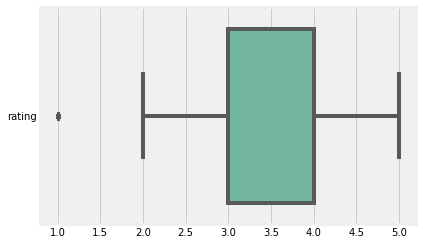

In [103]:
data_outlier3 = datamerge[['rating']]
ax = sns.boxplot(data=data_outlier3, orient="h", palette="Set2")

### 3.4 Drop columns

In [104]:
# Keep all columns of data

### 3.5 Reformatting data

In [105]:
# Did not need to Reformat data

### 4.0 Modeling

In [106]:
# Import modeling Algorithums
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import (plot_confusion_matrix, confusion_matrix, 
                             accuracy_score, mean_squared_error, r2_score, 
                             roc_auc_score, roc_curve, classification_report, 
                             precision_recall_curve, auc, f1_score, 
                             average_precision_score, precision_score, recall_score)

In [107]:
# Defining function to calculate the Metrics Scores
def qc_metrics_score(cm):
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0] / (cm[0, 1] + cm[0, 0])
    values = [np.round(accuracy * 100, 2),
            np.round(precision * 100, 2),
            np.round(sensitivity * 100, 2),
            np.round(f1 * 100, 2),
            np.round(specificity * 100, 2)]
    plt.figure(figsize = (15, 8))
    sns.set_palette('magma')
    ax = sns.barplot(x = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'Specificity'], y = values)
    plt.yticks(np.arange(0, 100, 10))
    plt.ylabel('Percentage %', labelpad = 10)
    plt.xlabel('Scoring Parameter', labelpad = 10)
    plt.title('Metrics Scores', pad = 20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()), xytext = (p.get_x() + 0.3, p.get_height() + 1.02))
    plt.show()

In [108]:
# Defining function to plot ROC Curve
def plotting_roc_curve(fpr, tpr):
    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, color = 'Orange', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
    plt.ylabel('True Positive Rate', labelpad = 10)
    plt.xlabel('False Positive Rate', labelpad = 10)
    plt.title('Receiver Operating Characteristic (ROC) Curve', pad = 20)
    plt.legend()
    plt.show()

In [109]:
# Defining variables to store the outputs.
roc_auc={}

### 4.1 Model-1 (Classification Model)
The model should answer given age, occupation field, and gender, if a selected movie is going
to be rated by the user under or above average rate (3). 
Due to the moderately imbalanced nature of the target classes (ratings), a weighted avg score, which is 
essentially a metric defined as a macro-averaged balance between precision and recall, 
was used to evaluate the performance of the classification model.
First, the categorical features were dropped as well as zipcode.

In [110]:
# Drop unwanted Columns
datamerge1=datamerge.drop(columns=['title','genres','zipcode'])
datamerge1.head()

,movie_id,user_id,rating,gender,age_desc,occ_desc
0,1,1,5,F,1,10
1,48,1,5,F,1,10
2,150,1,5,F,1,10
3,260,1,4,F,1,10
4,527,1,5,F,1,10


In [111]:
# Gender feature is being converted into binary values.
datamerge2 = pd.get_dummies(datamerge1,columns=['gender'],prefix=['gen',],dtype=int)
datamerge2

,movie_id,user_id,rating,age_desc,occ_desc,gen_F,gen_M
0,1,1,5,1,10,1,0
1,48,1,5,1,10,1,0
2,150,1,5,1,10,1,0
3,260,1,4,1,10,1,0
4,527,1,5,1,10,1,0
...,...,...,...,...,...,...,...
1000204,3513,5727,4,25,4,0,1
1000205,3535,5727,2,25,4,0,1
1000206,3536,5727,5,25,4,0,1
1000207,3555,5727,3,25,4,0,1


In [112]:
# Two target rate estimation classes are created: "Yes">3, and "No"<=3.
conditions = [(datamerge2['rating']>3),
    (datamerge2['rating']<=3)]
values = ['Yes','No']
datamerge2['R_estim'] = np.select(conditions, values)
datamerge2

,movie_id,user_id,rating,age_desc,occ_desc,gen_F,gen_M,R_estim
0,1,1,5,1,10,1,0,Yes
1,48,1,5,1,10,1,0,Yes
2,150,1,5,1,10,1,0,Yes
3,260,1,4,1,10,1,0,Yes
4,527,1,5,1,10,1,0,Yes
...,...,...,...,...,...,...,...,...
1000204,3513,5727,4,25,4,0,1,Yes
1000205,3535,5727,2,25,4,0,1,No
1000206,3536,5727,5,25,4,0,1,Yes
1000207,3555,5727,3,25,4,0,1,No


In [113]:
# Decision Tree Classifier model
cols = ['movie_id','user_id','age_desc','occ_desc','gen_F','gen_M']
X = datamerge2[cols]
Y = datamerge2['R_estim']

In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
X_tr, X_val, Y_tr, Y_val = train_test_split(X,Y, test_size=.2, random_state=777)

In [115]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=100,
                                  max_depth=10, min_samples_leaf=1)
model_dt.fit(X_tr, Y_tr)
model_dt_predict = model_dt.predict(X_val)
model_dt_predict
accuracy_score(Y_val, model_dt_predict)*100

61.74453364793393

In [116]:
print(classification_report(Y_val, model_dt_predict))

              precision    recall  f1-score   support

          No       0.56      0.42      0.48     84595
         Yes       0.64      0.76      0.70    115447

    accuracy                           0.62    200042
   macro avg       0.60      0.59      0.59    200042
weighted avg       0.61      0.62      0.61    200042



### Confusion matrix

- Example of confusion matrix usage to evaluate the quality of the output of a classifier on the data set. 

- The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

- The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

To measure the performance of a model, we need several elements Confusion matrix : also known as the error matrix, allows visualization of the performance of an algorithm

    True Positive (TP) : rating>3 correctly identified as Yes
    True Negative (TN) : rating<3 correctly identified as No
    False Positive (FP) : rating<3 incorrectly identified as Yes
    False Negative (FN) : rating>3 incorrectly identified as No

Metrics

    Accuracy : (TP + TN) / (TP + TN + FP +FN)
    Precision : TP / (TP + FP)
    Recall : TP / (TP + FN)
    F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

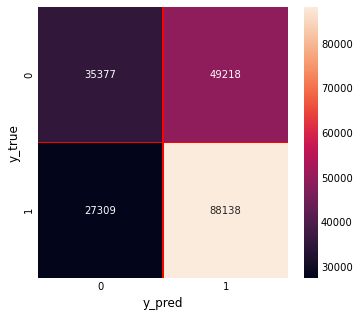

In [117]:
y_pred = model_dt.predict(X_val)
y_true = Y_val

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
# print(classification_report(y_true, y_pred))


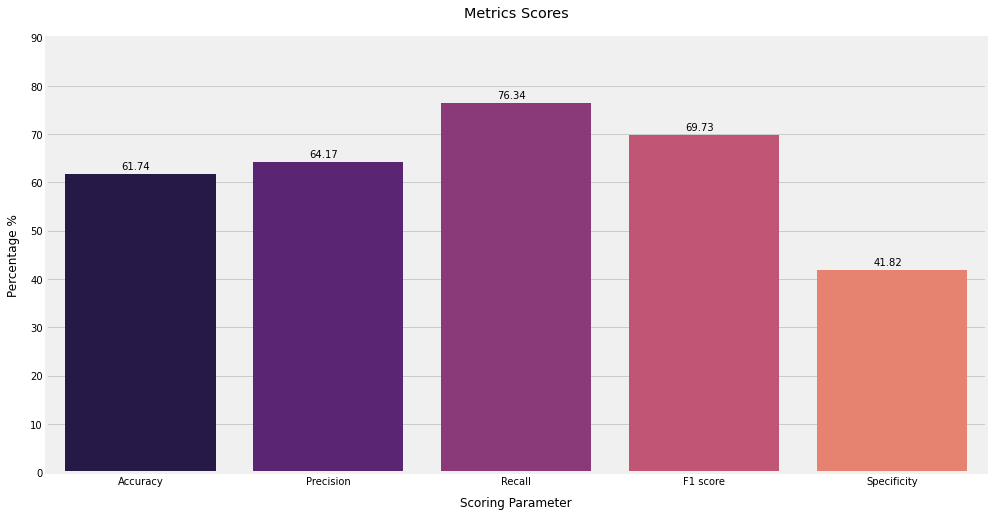

In [118]:
qc_metrics_score(cm)

### Results:
- The first results look good, all avareging scores (the accuracy score,macro avg and weighted avg) are around 0.60.
- The recommender system based on this model is supposed to be able to "recommend" or "not to recommend" a movie selected by a user with known age, occupation field and gender (from user profile/account). 
- However, after analysis of the input feature importance, it became obvious that the model is driven by popularity of the movies (movie_id), which has the most weight. This is shown in the plot below (movie_id has highest importance and gender M/F the lowest feature importance) 

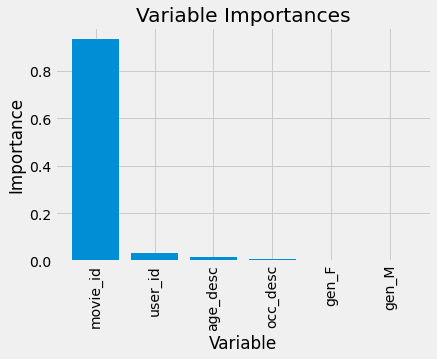

In [119]:
input_features = X_tr.columns
feature_importance = model_dt.feature_importances_
feature_list = list(input_features)

from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=400)
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))
# Make a bar chart
plt.bar(input_features, feature_importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(input_features, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [120]:
# Get numerical feature importances
importances = model_dt.feature_importances_
# List of tuples with variable and importance
feature_importances = [(input_features, round(feature_importance, 2)) for input_features, feature_importance in zip(feature_list, feature_importance)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: movie_id             Importance: 0.94
Variable: user_id              Importance: 0.03
Variable: age_desc             Importance: 0.02
Variable: occ_desc             Importance: 0.01
Variable: gen_F                Importance: 0.0
Variable: gen_M                Importance: 0.0


<AxesSubplot:>

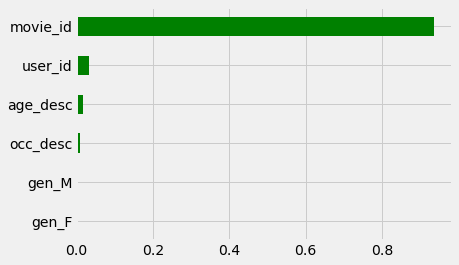

In [121]:
# Input features y-axis, feature importance x-axis
input_features = X_tr.columns
feature_importance = model_dt.feature_importances_
dt_feature_list = pd.Series(feature_importance, input_features)
dt_feature_list.sort_values().plot.barh(color='green')

### Classification Model (Model-1) Summary
- At this point it was decided to test and apply Content-Based/Collaborative Filtering techniques to find a resonable Movie Recommendation System
- Similar movies based only on the ratings are using cosine similarity metrics.  

### 4.2 Model-2 (Simplistic Collaborative filtering system) - Using Correlations

In [122]:
# https://amanmander123.github.io/collaborative-filtering-based-recommendation-system.html

#### Model2 Overview
As of right now, the recommender generates a list of top 10 recommendations for any user in the dataset.

Recommender steps below:
1. First load the raw data tables - movies and ratings
2. Then merge the 2 data tables together using the movie_id key 
3. Then generate a pivot table with the values as the ratings, the movie titles as the rows and the user IDs as the columns
4. A correlation matrix is then generated that represents the correlations between movies
5. Then the movies that the selected user has already watched are extracted and their correlations with the other movies are then summed
6. The recommendation list is then sorted from highest to lowest correlation and the movies with the top 10 correlations are then recommended

Pros:
- very basic and simplistic collaborative filtering based recommender

Cons:
- Limitation of this technique is that if a user has not rated any movies, a recommendation cannot be provided since we do not understand the preferences of the user, known as the cold start problem.

In [123]:
# https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/

Creating Pivot Table
- user_id, title and rating
- the rows are user_ids and the columns represent the movies.
- The values of the matrix represent the rating for each movie by each user)

In [124]:
# Using merged dataset (movies, ratings and users)
movie_user = datamerge.pivot_table(index='user_id',columns='title',values='rating')

In [125]:
# List pivot table
movie_user.head(10)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select a movie to test our recommender system.
- Choose any movie title from the data (Toy Story (1995)).

#### Recommender system result
- To find the correlation value for the movie with all other movies in the data we will pass all the ratings of the picked movie to the corrwith method of the Pandas Dataframe.
- The method computes the pairwise correlation between rows or columns of a DataFrame with rows or columns of Series or DataFrame.

In [126]:
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head(20)

title
$1,000,000 Duck (1971)                -0.132004
'Night Mother (1986)                   0.261793
'Til There Was You (1997)              0.156468
'burbs, The (1989)                    -0.077789
...And Justice for All (1979)          0.040958
1-900 (1994)                                NaN
10 Things I Hate About You (1999)      0.134068
101 Dalmatians (1961)                  0.364210
101 Dalmatians (1996)                  0.339854
12 Angry Men (1957)                    0.149226
13th Warrior, The (1999)               0.039598
187 (1997)                             0.343280
2 Days in the Valley (1996)            0.072017
20 Dates (1998)                        0.151206
20,000 Leagues Under the Sea (1954)    0.271548
200 Cigarettes (1999)                  0.134106
2001: A Space Odyssey (1968)           0.052967
2010 (1984)                            0.103806
24 7: Twenty Four Seven (1997)              NaN
24-hour Woman (1998)                        NaN
dtype: float64

#### Average Rating

The dataset is a collection of ratings by a number of users for different movies. Let’s find out the average rating for each and every movie in the dataset.

In [127]:
Average_ratings = pd.DataFrame(datamerge.groupby('title')['rating'].mean())
Average_ratings.head(10)

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
1-900 (1994),2.500000
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703


#### Total Number Of Rating
The rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [128]:
Average_ratings['Total Ratings'] = pd.DataFrame(datamerge.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199
1-900 (1994),2.500000,2
10 Things I Hate About You (1999),3.422857,700
101 Dalmatians (1961),3.596460,565
101 Dalmatians (1996),3.046703,364


In [129]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head()

,Correlation,Total Ratings
title,,
"$1,000,000 Duck (1971)",-0.132004,37
'Night Mother (1986),0.261793,70
'Til There Was You (1997),0.156468,52
"'burbs, The (1989)",-0.077789,303
...And Justice for All (1979),0.040958,199


Testing The Recommendation System

Filter all the movies with a correlation value to Toy Story (1995) and with at least 100 ratings.

In [130]:
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

In [131]:
recc = recc.merge(movies,on='title', how='left')
recc.head(11)

,title,Correlation,Total Ratings,movie_id,genres
0,Toy Story (1995),1.000000,2077,1,Animation|Children's|Comedy
1,Toy Story 2 (1999),0.630386,1585,3114,Animation|Children's|Comedy
2,Ninotchka (1939),0.481678,132,936,Comedy|Romance
3,My Man Godfrey (1936),0.469717,188,947,Comedy
4,Air Bud (1997),0.467352,112,1592,Children's|Comedy
5,"Bug's Life, A (1998)",0.449198,1703,2355,Animation|Children's|Comedy
6,Oliver & Company (1988),0.446338,144,709,Animation|Children's
7,Cat Ballou (1965),0.431762,280,3873,Comedy|Western
8,Aladdin (1992),0.429626,1351,588,Animation|Children's|Comedy|Musical
9,"Raisin in the Sun, A (1961)",0.426576,143,3350,Drama


### 4.3 Model-3 (Content Based Recommendation system) - TfidfVectorizer Algorithm
With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file movies.csv.

In [132]:
# https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
# https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275

### Building a recommender using TF-IDF
1. Steps
- Text preprocessing
- Generate tf-idf vectors
- Generate cosine-similarity matrix
2. The recommender function
- Take a movie title (genres), cosine similarity matrix and indices series as arguments
- Extract pairwise cosine similarity scores for the movie
- Sort the scores in descending order
- Output titles corresponding to the highest scores
- Ignore the highest similarity score (of 1)

In [133]:
# Text Preprocessing - Break up the genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [134]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']
...,...,...,...
3878,3948,Meet the Parents (2000),['Comedy']
3879,3949,Requiem for a Dream (2000),['Drama']
3880,3950,Tigerland (2000),['Drama']
3881,3951,Two Family House (2000),['Drama']


I do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively. In order to do so, I'll use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [135]:
# Generate tf-idf vectors
# Generate cosine-similarity matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

# class sklearn.feature_extraction.text.TfidfVectorizer
# Parameters:
#    analyzer: {‘word’, ‘char’, ‘char_wb’} or callable, default=’word’
#             Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only 
#             from text inside word boundaries; n-grams at the edges of words are padded with space.
#    ngram_range: tuple (min_n, max_n), default=(1, 1)
#            The lower and upper boundary of the range of n-values for different n-grams to be extracted. 
#            All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means 
#            only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. 
#            Only applies if analyzer is not callable.

(3883, 127)

In [136]:
#print (tfidf_matrix)

I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

The recommender takes in a title, a cosine similarity matrix, and a movie title and index mapping as arguments and outputs a list of 20 titles most similar to the original title (excluding the title itself).

In [137]:
from sklearn.metrics.pairwise import linear_kernel
# Compute cosine similarity matrix
#cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # Faster method for 
# Print cosine similarity matrix
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [138]:
sorted(list(enumerate(cosine_sim[0])), reverse=True, key=lambda x:x[1])[1:21]

[(1050, 0.9999999999999998),
 (2072, 0.9999999999999998),
 (2073, 0.9999999999999998),
 (2285, 0.9999999999999998),
 (2286, 0.9999999999999998),
 (3045, 0.9999999999999998),
 (3542, 0.9999999999999998),
 (3682, 0.9999999999999998),
 (3685, 0.9999999999999998),
 (236, 0.8698051727595141),
 (12, 0.8268110689140029),
 (241, 0.8268110689140029),
 (310, 0.8268110689140029),
 (592, 0.8268110689140029),
 (612, 0.8268110689140029),
 (700, 0.8268110689140029),
 (876, 0.8268110689140029),
 (1010, 0.8268110689140029),
 (1012, 0.8268110689140029),
 (1020, 0.8268110689140029)]

In [139]:
print(movies.iloc[[1050]].title)

1050    Aladdin and the King of Thieves (1996)
Name: title, dtype: object


In [140]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = cosine_sim[movie_index]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:11]
    
    for i in movie_list:
        print(movies.iloc[i[0]].title)

Let's try and get the top recommendations for a few movies and see how good the recommendations are.

In [141]:
genre_recommendations('Toy Story (1995)')

Aladdin and the King of Thieves (1996)
American Tail, An (1986)
American Tail: Fievel Goes West, An (1991)
Rugrats Movie, The (1998)
Bug's Life, A (1998)
Toy Story 2 (1999)
Saludos Amigos (1943)
Chicken Run (2000)
Adventures of Rocky and Bullwinkle, The (2000)
Goofy Movie, A (1995)


In [142]:
genre_recommendations('Avengers, The (1998)')

Waterworld (1995)
Good Man in Africa, A (1994)
Quest, The (1996)
Fled (1996)
Adventures of Robin Hood, The (1938)
Ghost and the Darkness, The (1996)
Raiders of the Lost Ark (1981)
Highlander (1986)
Indiana Jones and the Last Crusade (1989)
Conan the Barbarian (1982)


In [143]:
genre_recommendations('Jeremiah Johnson (1972)')

Wyatt Earp (1994)
Bad Girls (1994)
Tombstone (1993)
Wild Bunch, The (1969)
Dead Man (1995)
Angel and the Badman (1947)
Outlaw, The (1943)
Davy Crockett, King of the Wild Frontier (1955)
Once Upon a Time in the West (1969)
Unforgiven (1992)


In [144]:
genre_recommendations('Abbott and Costello Meet Frankenstein (1948)')

Tales from the Hood (1995)
Cemetery Man (Dellamorte Dellamore) (1994)
Frighteners, The (1996)
Braindead (1992)
Bad Taste (1987)
Young Frankenstein (1974)
April Fool's Day (1986)
Machine, The (1994)
Gremlins (1984)
Gremlins 2: The New Batch (1990)


### Output Model3 files for WebApp Setup

In [145]:
# Pickling is the serializing and de-serializing of python objects to a byte stream. Unpicking is the opposite.
# The serialization process is a way to convert a data structure into a linear form that can be stored or transmitted 
# over a network.
# The reverse process, which takes a stream of bytes and converts it back into a data structure, is called deserialization.
#
# Pickling is used to store python objects. This means things like lists, dictionaries, class objects, and more.
#
import pickle

In [146]:
# Write the pickled representation of the object (movies) obj to the open file object file.
pickle.dump(movies,open('movies.pkl','wb'))

In [147]:
# Write the pickled representation of the object (cosine_sim) obj to the open file object file.
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))

In [148]:
#converting movies dataframe to dictionary
movies.to_dict()

{'movie_id': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  50: 51,
  51: 52,
  52: 53,
  53: 54,
  54: 55,
  55: 56,
  56: 57,
  57: 58,
  58: 59,
  59: 60,
  60: 61,
  61: 62,
  62: 63,
  63: 64,
  64: 65,
  65: 66,
  66: 67,
  67: 68,
  68: 69,
  69: 70,
  70: 71,
  71: 72,
  72: 73,
  73: 74,
  74: 75,
  75: 76,
  76: 77,
  77: 78,
  78: 79,
  79: 80,
  80: 81,
  81: 82,
  82: 83,
  83: 84,
  84: 85,
  85: 86,
  86: 87,
  87: 88,
  88: 89,
  89: 90,
  90: 92,
  91: 93,
  92: 94,
  93: 95,
  94: 96,
  95: 97,
  96: 98,
  97: 99,
  98: 100,
  99: 101,
  100

In [149]:
#making pkl file of dictionary
pickle.dump(movies.to_dict(),open('movies_dict.pkl','wb'))

#### Summary - Model3 ((Content Based Recommendation system) - TfidfVectorizer Algorithm
Good recommendations for Toy Story (Animation, Children's, Comedy), Avengers, The (1998), Jeremiah Johnson (Western) and Abbott and Costello Meet Frankenstein (1948).

Overall, here are the pros of using content-based recommendation:

- No need for data on other users, thus no cold-start or sparsity problems.
- Can recommend to users with unique tastes.
- Can recommend new & unpopular items.

However, there are some cons of using this approach:

- Finding the appropriate features is hard.
- Does not recommend items outside a user's content profile.

In [150]:
# The End